In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install biopython seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 24.7 MB/s eta 0:00:00


In [3]:
root_dir = "/content/drive/MyDrive/ComputerVisionFinalProject/2024-12-09_23-16-14"

In [4]:
import os
print(os.listdir(root_dir))

['config.yaml', 'last.ckpt', 'epoch=11-step=44076.ckpt', 'epoch=75-step=279148.ckpt', '.DS_Store', 'sample_15_idx_15_len_98', 'sample_22_idx_22_len_89', 'sample_5_idx_5_len_118', 'sample_36_idx_36_len_60', 'sample_33_idx_33_len_69', 'sample_38_idx_38_len_60', 'sample_14_idx_14_len_108', 'sample_39_idx_39_len_60', 'sample_9_idx_9_len_118', 'sample_0_idx_0_len_128', 'sample_16_idx_16_len_98', 'sample_8_idx_8_len_118', 'sample_37_idx_37_len_60', 'sample_3_idx_3_len_128', 'sample_35_idx_35_len_60', 'sample_25_idx_25_len_79', 'sample_24_idx_24_len_89', 'sample_23_idx_23_len_89', 'sample_6_idx_6_len_118', 'sample_32_idx_32_len_69', 'sample_28_idx_28_len_79', 'sample_13_idx_13_len_108', 'sample_19_idx_19_len_98', 'sample_21_idx_21_len_89', 'sample_11_idx_11_len_108', 'sample_27_idx_27_len_79', 'sample_30_idx_30_len_69', 'sample_10_idx_10_len_108', 'sample_12_idx_12_len_108', 'sample_2_idx_2_len_128', 'sample_29_idx_29_len_79', 'sample_31_idx_31_len_69', 'sample_4_idx_4_len_128', 'sample_1_idx

In [5]:
import os
import Bio.PDB as PDB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Bio.PDB import *
from pathlib import Path

Processing sample_15_idx_15_len_98...
Processing sample_22_idx_22_len_89...
Processing sample_5_idx_5_len_118...
Processing sample_36_idx_36_len_60...
Processing sample_33_idx_33_len_69...
Processing sample_38_idx_38_len_60...
Processing sample_14_idx_14_len_108...
Processing sample_39_idx_39_len_60...
Processing sample_9_idx_9_len_118...
Processing sample_0_idx_0_len_128...
Processing sample_16_idx_16_len_98...
Processing sample_8_idx_8_len_118...
Processing sample_37_idx_37_len_60...
Processing sample_3_idx_3_len_128...
Processing sample_35_idx_35_len_60...
Processing sample_25_idx_25_len_79...
Processing sample_24_idx_24_len_89...
Processing sample_23_idx_23_len_89...
Processing sample_6_idx_6_len_118...
Processing sample_32_idx_32_len_69...
Processing sample_28_idx_28_len_79...
Processing sample_13_idx_13_len_108...
Processing sample_19_idx_19_len_98...
Processing sample_21_idx_21_len_89...
Processing sample_11_idx_11_len_108...
Processing sample_27_idx_27_len_79...
Processing samp

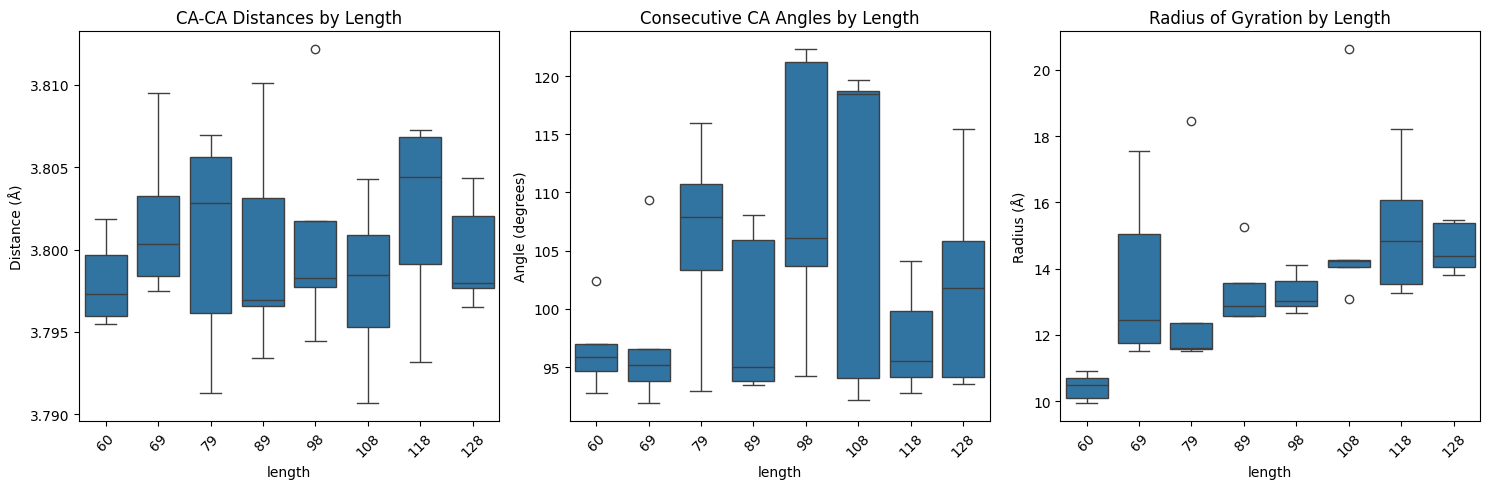

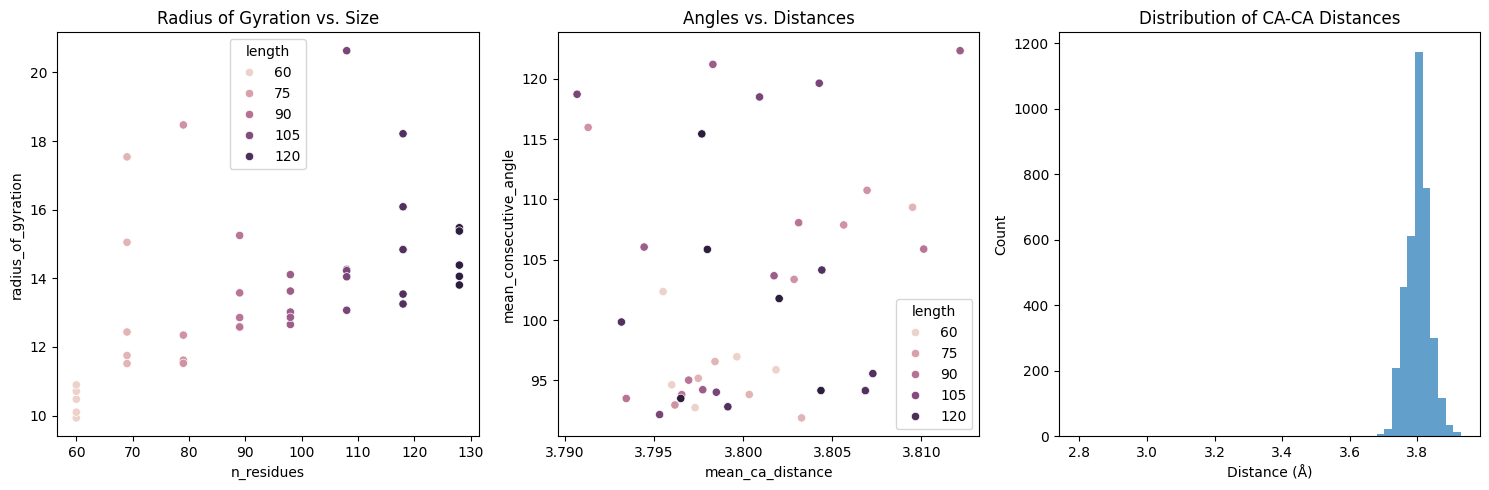


Structural Statistics Summary:
       mean_ca_distance        mean_consecutive_angle          \
                   mean    std                   mean     std   
length                                                          
60                3.798  0.003              96.509003   3.626   
69                3.802  0.005              97.358002   6.921   
79                3.801  0.007             106.185997   8.694   
89                3.800  0.007              99.255997   7.111   
98                3.801  0.007             109.490997  12.047   
108               3.798  0.005             108.601997  14.183   
118               3.802  0.006              97.297997   4.647   
128               3.800  0.003             102.142998   9.067   

       radius_of_gyration         
                     mean    std  
length                            
60                 10.423  0.403  
69                 13.658  2.584  
79                 13.103  3.018  
89                 13.368  1.128  
98     

In [6]:
class ProteinStructureAnalyzer:
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.parser = PDB.PDBParser(QUIET=True)
        self.results = []

    # Analyze a single structure
    def analyze_structure(self, pdb_path):

        structure = self.parser.get_structure('protein', pdb_path)

        # Initialize measurement lists
        ca_ca_distances = []
        consecutive_angles = []
        ca_coords = []

        # Analyze residues
        residues = list(structure.get_residues())
        for i in range(len(residues)-1):
            try:
                if 'CA' in residues[i] and 'CA' in residues[i+1]:
                    ca1 = residues[i]['CA']
                    ca2 = residues[i+1]['CA']

                    # Store CA coordinates
                    ca_coords.append(ca1.get_coord())

                    # Calculate CA-CA distance
                    distance = ca1 - ca2
                    ca_ca_distances.append(distance)

                    # Calculate consecutive residue angles if possible
                    if i < len(residues)-2 and 'CA' in residues[i+2]:
                        ca3 = residues[i+2]['CA']
                        v1 = ca1.get_coord() - ca2.get_coord()
                        v2 = ca3.get_coord() - ca2.get_coord()
                        angle = np.degrees(np.arccos(np.dot(v1, v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))))
                        consecutive_angles.append(angle)
            except:
                continue

        # Calculate structural properties
        ca_coords = np.array(ca_coords)
        radius_of_gyration = np.sqrt(np.mean(np.sum((ca_coords - np.mean(ca_coords, axis=0))**2, axis=1)))

        return {
            'n_residues': len(residues),
            'n_atoms': sum(1 for _ in structure.get_atoms()),
            'mean_ca_distance': np.mean(ca_ca_distances),
            'std_ca_distance': np.std(ca_ca_distances),
            'mean_consecutive_angle': np.mean(consecutive_angles) if consecutive_angles else 0,
            'std_consecutive_angle': np.std(consecutive_angles) if consecutive_angles else 0,
            'radius_of_gyration': radius_of_gyration,
            'ca_ca_distances': ca_ca_distances,
            'consecutive_angles': consecutive_angles
        }

    # Process all PDB files in the directory structure
    def process_structures(self):
        for folder in os.listdir(self.root_dir):
            folder_path = os.path.join(self.root_dir, folder)
            if os.path.isdir(folder_path):
                pdb_files = [f for f in os.listdir(folder_path) if f.endswith('.pdb')]
                if pdb_files:
                    try:
                        pdb_path = os.path.join(folder_path, pdb_files[0])
                        print(f"Processing {folder}...")

                        metrics = self.analyze_structure(pdb_path)
                        metrics['folder'] = folder
                        length = folder.split('len_')[-1].split('_')[0] if 'len_' in folder else None
                        metrics['length'] = int(length) if length else None
                        self.results.append(metrics)
                    except Exception as e:
                        print(f"Error processing {folder}: {e}")

        return pd.DataFrame(self.results)

    def visualize_analysis(self, df):
        # Figure 1: Basic structural properties
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        sns.boxplot(x='length', y='mean_ca_distance', data=df)
        plt.title('CA-CA Distances by Length')
        plt.xticks(rotation=45)
        plt.ylabel('Distance (Å)')

        plt.subplot(1, 3, 2)
        sns.boxplot(x='length', y='mean_consecutive_angle', data=df)
        plt.title('Consecutive CA Angles by Length')
        plt.xticks(rotation=45)
        plt.ylabel('Angle (degrees)')

        plt.subplot(1, 3, 3)
        sns.boxplot(x='length', y='radius_of_gyration', data=df)
        plt.title('Radius of Gyration by Length')
        plt.xticks(rotation=45)
        plt.ylabel('Radius (Å)')

        plt.tight_layout()
        plt.show()

        # Figure 2: Relationships between metrics
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        sns.scatterplot(data=df, x='n_residues', y='radius_of_gyration', hue='length')
        plt.title('Radius of Gyration vs. Size')

        plt.subplot(1, 3, 2)
        sns.scatterplot(data=df, x='mean_ca_distance', y='mean_consecutive_angle', hue='length')
        plt.title('Angles vs. Distances')

        plt.subplot(1, 3, 3)
        all_distances = np.concatenate(df['ca_ca_distances'].values)
        plt.hist(all_distances, bins=50, alpha=0.7)
        plt.title('Distribution of CA-CA Distances')
        plt.xlabel('Distance (Å)')
        plt.ylabel('Count')

        plt.tight_layout()
        plt.show()

# Example usage
analyzer = ProteinStructureAnalyzer("/content/drive/MyDrive/ComputerVisionFinalProject/2024-12-09_23-16-14")
df = analyzer.process_structures()
analyzer.visualize_analysis(df)

# Print statistical summary
print("\nStructural Statistics Summary:")
summary = df.groupby('length').agg({
    'mean_ca_distance': ['mean', 'std'],
    'mean_consecutive_angle': ['mean', 'std'],
    'radius_of_gyration': ['mean', 'std']
}).round(3)
print(summary)

# Save results
df.to_csv('detailed_structure_analysis.csv')